# <center>Machine Intelligence 1</center>

<h2 align="right">Exercise Sheet 03</h2> 

<pre style="text-align: right">
Gruppe:             
                MeSi
Autoren:            
Jens Meiners
Arne Siebenmorgen
</pre>

#### 3.1 MLP Backpropagation (5 points)

In [10]:
# imports 
import numpy as np
from numpy import tanh
from numpy.random import random

In [134]:
# basic functions
def d_tanh(x):
    """
    the differentiated function of tanh
    """
    return 1.0 - np.power(tanh(x),2)

def rand(shape, off=0.5):
    """
    returns a matrix of given shape with random entries in [0,1) - off
    """
    return random(shape)-off

def to_matrix(x):
    return np.atleast_2d(x)

In [179]:
class MLP:

    def __init__(self, layers):
        """
        initialize with a construction plan like [1,3,1] denoting
        one input node, three nodes in the hidden layer and one output node
        """
        # preparing bias weights - add one to every layer but the last.
        layers = [layers[i] + 1 for i in range(len(layers))]
        layers[-1] -= 1
        # initialize weights
        self.w = [rand((layers[i], layers[i+1])) for i in range(len(layers) - 1)]

    def fit(self, X, y, alpha=0.2, eta=10000, verbose=True):
        # for X of shape 2x3 we want to add another column of ones to
        # the front resulting in X of shape 2x4 with X[:,0] = 1
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        
        for k in range(eta):
            # pick a random example
            i = np.random.randint(X.shape[0])
            # first feedforward input is the input layer for this pick
            feed = [X[i]]
            for l in range(len(self.w)):
                # feed forward, append this layers result for next iterations input
                feed.append(tanh(np.dot(feed[l], self.w[l])))
            res = feed[-1]
            
            # find error; delta
            e = y[i] - res
            d = [e * d_tanh(res)]

            # start right before the ouput layer, iterating backwards to 0
            for l in range(len(feed) - 2, 0, -1): 
                d.append(d[-1].dot(self.w[l].T) * d_tanh(feed[l]))

            # weight update
            for i in range(len(self.w)):
                self.w[i] += alpha * to_matrix(feed[i]).T.dot(to_matrix(d[::-1][i]))
            
            if verbose:
                if k % 1000 == 0: print 'error:', e

    def predict(self, x): 
        feed = np.concatenate((np.ones(1).T, np.array(x)), axis=1)      
        for l in range(0, len(self.w)):
            feed = tanh(np.dot(feed, self.w[l]))
        return feed

We could not get the vectorized version to run. Therefor we implemented a stochastic approach that picks a random training point every iteration. the rest should be as requested.

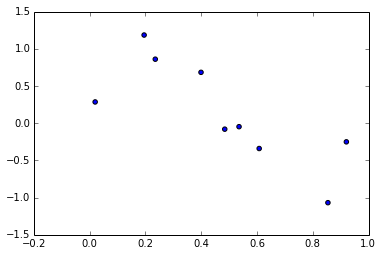

In [164]:
#TODO daten laden
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline

data = genfromtxt('RegressionData.txt', delimiter=' ', skip_header=1)

#print data

plt.scatter(data[:,0],data[:,1])

error: [-1.07343268]
error: [ 0.16852285]
error: [ 0.13149575]
error: [-0.57654006]
error: [-0.44620475]
error: [ 0.29159428]
error: [-0.53628084]
error: [ 0.3712658]
error: [-0.0627453]
error: [ 0.05186125]


/home/jens/Programme/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:44: DeprecationWarning: axis != 0 for ndim == 1; this will raise an error in future versions of numpy


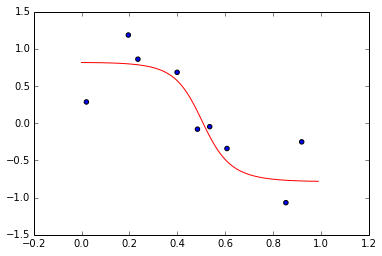

In [150]:
mlp = MLP([1,7,7,1])
X = to_matrix(data[:,0]).T
y = data[:,1]
mlp.fit(X, y,alpha=0.5,eta=9999)
pred = [mlp.predict([x]) for x in np.arange(0,1,0.01)]

plt.scatter(data[:,0],data[:,1])
plt.plot(np.arange(0,1,0.01),pred,c='r')

#### 3.2 Application to a simulated experiment (2 points)

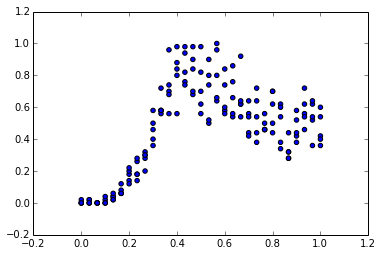

In [151]:
data = genfromtxt('simulatedRFmapping.csv', delimiter=',', skip_header=1)
# "normalizing"
data[:,0] = data[:,0] / max(data[:,0])
data[:,1] = data[:,1] / max(data[:,1])

#print data
plt.scatter(data[:,0],data[:,1])

error: [ 0.52688857]
error: [-0.11758066]
error: [-0.18538908]
error: [-0.05804267]
error: [ 0.12577282]
error: [-0.0351347]
error: [-0.0184215]
error: [-0.04517655]
error: [-0.06490474]
error: [-0.03982506]


/home/jens/Programme/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:44: DeprecationWarning: axis != 0 for ndim == 1; this will raise an error in future versions of numpy


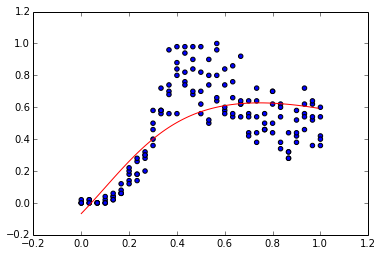

In [152]:
mlp = MLP([1,2,1])
X = to_matrix(data[:,0]).T
y = data[:,1]
mlp.fit(X, y,alpha=0.1,eta=9999)
pred = [mlp.predict([x]) for x in np.arange(0,1,0.01)]

plt.scatter(data[:,0],data[:,1])
plt.plot(np.arange(0,1,0.01),pred,c='r')

small number of hidden nodes results in simpler functions

error: [ 0.27807436]
error: [-0.20333803]
error: [-0.05947434]
error: [-0.11353243]
error: [-0.06967604]
error: [-0.00735859]
error: [ 0.0370055]
error: [ 0.08487016]
error: [-0.16776869]
error: [-0.14646791]


/home/jens/Programme/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:44: DeprecationWarning: axis != 0 for ndim == 1; this will raise an error in future versions of numpy


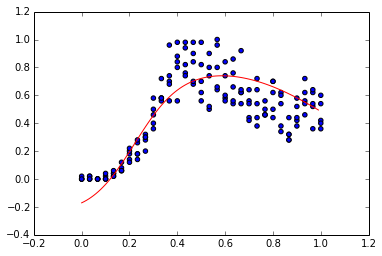

In [153]:
mlp = MLP([1,5,1])
X = to_matrix(data[:,0]).T
y = data[:,1]
mlp.fit(X, y,alpha=0.2,eta=9999)
pred = [mlp.predict([x]) for x in np.arange(0,1,0.01)]

plt.scatter(data[:,0],data[:,1])
plt.plot(np.arange(0,1,0.01),pred,c='r')

Still quite simple, but fitting the data way better

error: [ 0.35446011]
error: [-0.47271786]
error: [ 0.49524687]
error: [ 0.5423521]
error: [-0.02207277]
error: [ 0.04684164]
error: [ 0.01684036]
error: [ 0.17256514]
error: [-0.35079558]
error: [ 0.09524498]


/home/jens/Programme/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:44: DeprecationWarning: axis != 0 for ndim == 1; this will raise an error in future versions of numpy


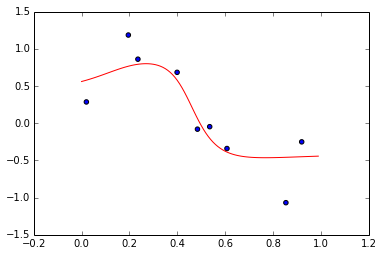

In [166]:
mlp = MLP([1,5,5,5,1])
X = to_matrix(data[:,0]).T
y = data[:,1]
mlp.fit(X, y,alpha=0.2,eta=9999)
pred = [mlp.predict([x]) for x in np.arange(0,1,0.01)]

plt.scatter(data[:,0],data[:,1])
plt.plot(np.arange(0,1,0.01),pred,c='r')

adding new hidden layers is the real fun

#### 3.3 Crossvalidation (3 points)

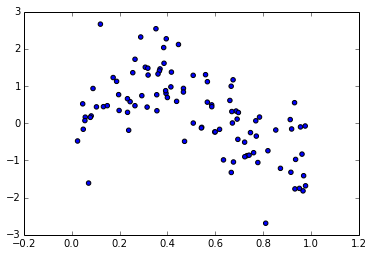

In [214]:
# create dataset 
n = 100
X = rand((n,1),off=0)
mu, sigma = 0, 0.8 # mean and standard deviation
e = np.random.normal(mu, sigma, n)
y = (np.sin(1.5*np.pi*X.T) + e).T # f(x) = sin(1.5πx) + e
plt.scatter(X,y)

In [215]:
data = range(100)
num_folds = 5
sub = len(data)/num_folds
units = [1, 2, 3, 4, 6, 8, 10]
accs_test = np.zeros((num_folds,len(units)))
accs_train = np.zeros((num_folds,len(units)))

for j,n in enumerate(units):
    #print 'n',n
    for i in range(num_folds):
        #print 'i',i
        #print 'i',i
        test = data[i*sub:][:sub]
        #print 'test',test
        train = data[:i*sub] + data[(i+1)*sub:]
        #print 'train',train
        mlp = MLP([1,n,1])

        mlp.fit(X[train], y[train],alpha=0.5,eta=9999, verbose=False)
        pred = np.array([mlp.predict(x) for x in X[test]])
        accs_test[i,j] = abs(pred - y[test]).sum()
        pred = np.array([mlp.predict(x) for x in X[train]])
        accs_train[i,j] = abs(pred - y[train]).sum()
    

/home/jens/Programme/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: DeprecationWarning: axis != 0 for ndim == 1; this will raise an error in future versions of numpy


In [216]:
print 'test_set prediction'
for i,e in enumerate(accs_test.mean(0)/20):
    print 'hidden units:',units[i],'error:',e
print 'training set prediction'
for i,e in enumerate(accs_train.mean(0)/80):
    print 'hidden units:',units[i],'error:',e

test_set prediction
hidden units: 1 error: 0.67048134438
hidden units: 2 error: 0.690602855844
hidden units: 3 error: 0.664069502132
hidden units: 4 error: 0.703666381031
hidden units: 6 error: 0.7475698108
hidden units: 8 error: 0.725496900587
hidden units: 10 error: 0.687334595219
training set prediction
hidden units: 1 error: 0.691527836898
hidden units: 2 error: 0.685175242109
hidden units: 3 error: 0.660334621689
hidden units: 4 error: 0.711752567404
hidden units: 6 error: 0.67415650603
hidden units: 8 error: 0.71861711926
hidden units: 10 error: 0.650131521579


As we can see, the error decreases to a minimum at 3 hidden units for the test set prediction while steadily decreasing on the training set.
That makes perfectly sense regarding that a higher number of hidden units may overfit the training data and therefor yield bad results on the test set.